# Exploring TalkingData Mobile Users

____

**Data Schema**

<img src="index.png">

**Objective:** Classify user by gender and age in 12 groups; 'F23-', 'F24-26','F27-28','F29-32', 'F33-42', 'F43+',
'M22-', 'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+'.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dataurl = '/home/dbricare/Documents/Python/datasets/talkingdata/'

In [2]:
def inspectdata(testortrain, cols=None, rows=None):
    dataparams = {'sep':',', 'compression':'zip', 'usecols':cols, 'nrows':rows}
    df = pd.read_csv(dataurl+testortrain+'.csv.zip', **dataparams)
    print(df.shape)
    print(df.info())
    return df

In [3]:
ga = inspectdata('gender_age_train')
ga.head()

(74645, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
pbdm = inspectdata('phone_brand_device_model')
pbdm.head()

(187245, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
device_id       187245 non-null int64
phone_brand     187245 non-null object
device_model    187245 non-null object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB
None


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


___
# Some interesting questions to ask

## What is the most popular brand of phone in each demographic group?

In [5]:
popbrand = pd.merge(ga[['device_id', 'group']], pbdm[['device_id', 'phone_brand']], on='device_id')
popbrand.head()

,device_id,group,phone_brand
0,-8076087639492063270,M32-38,小米
1,-2897161552818060146,M32-38,小米
2,-8260683887967679142,M32-38,小米
3,-4938849341048082022,M29-31,小米
4,245133531816851882,M29-31,小米


In [15]:
groupbrand = popbrand.groupby(by=['group', 'phone_brand']).count()
groupbrand.head()

device_id
group phone_brand           
F23-  E派                   2
      HTC                 56
      LG                   8
      Lovme                4
      OPPO               741

In [56]:
for g in groupbrand.index.levels[0]:
    print('Demographic: {0} \t Most popular brand: {1} \t % of group users: {2:.1%}'.format(
            g, groupbrand.loc[g].idxmax()[0], groupbrand.loc[g].max()[0]/groupbrand.loc[g].sum()[0]))

Demographic: F23- 	 Most popular brand: 小米 	 % of group users: 18.7%
Demographic: F24-26 	 Most popular brand: 小米 	 % of group users: 23.3%
Demographic: F27-28 	 Most popular brand: 小米 	 % of group users: 25.5%
Demographic: F29-32 	 Most popular brand: 小米 	 % of group users: 23.7%
Demographic: F33-42 	 Most popular brand: 三星 	 % of group users: 24.4%
Demographic: F43+ 	 Most popular brand: 三星 	 % of group users: 24.4%
Demographic: M22- 	 Most popular brand: 小米 	 % of group users: 25.7%
Demographic: M23-26 	 Most popular brand: 小米 	 % of group users: 25.3%
Demographic: M27-28 	 Most popular brand: 小米 	 % of group users: 25.2%
Demographic: M29-31 	 Most popular brand: 小米 	 % of group users: 24.1%
Demographic: M32-38 	 Most popular brand: 小米 	 % of group users: 22.6%
Demographic: M39+ 	 Most popular brand: 华为 	 % of group users: 22.6%


### What is the most popular brand overall?

In [59]:
pbdm['phone_brand'].value_counts(normalize=True,ascending=False).head().apply(lambda x: str(x*100)[:4]+'%')

小米      23.0%
三星      18.3%
华为      17.3%
vivo    7.68%
OPPO    7.63%
Name: phone_brand, dtype: object

### Conclusion

***Xaomi*** is the most popular brand in most demographic groups and the most popular overall.

# What are the most popular apps?

In [6]:
al = inspectdata('app_labels')
al.head()

(459943, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459943 entries, 0 to 459942
Data columns (total 2 columns):
app_id      459943 non-null int64
label_id    459943 non-null int64
dtypes: int64(2)
memory usage: 7.0 MB
None


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


Do all app_id rows have unique values?

In [71]:
len(al['app_id'].unique())

113211

It seems there are about 4 labels on average for each app.

In [7]:
lc = inspectdata('label_categories')
lc.head()

(930, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
label_id    930 non-null int64
category    927 non-null object
dtypes: int64(1), object(1)
memory usage: 14.6+ KB
None


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


Having such a large number of categories isn't super useful. In a completely unrealistic ideal case, we'd like one app label that corresponds perfectly to a single category. Is there a way to group the labels that maximizes their predictive power (i.e., this app label appears frequently with this demographic group)?

In [67]:
# lc['subcat'] = lc['category'].apply(lambda x: str(x).split('-')[0])
# lc.head()
# lcspl = lc['category'].str.split('-')
# lcspl.head()
# lcmain = lc['category'].apply(lambda x: str(x).split('-')[0])
lc['category'].unique()

0                     NaN
1       [game, game type]
2     [game, Game themes]
3       [game, Art Style]
4    [game, Leisure time]
Name: category, dtype: object

How many label_ids actually appear in the app_id table and then in the event table?

In [72]:
len(al['label_id'].unique())

507

In [8]:
alc = pd.merge(al, lc, how='left', on='label_id')
alc.head()
# print(len(alc))

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [98]:
print(alc[~(alc['category']=='unknown')].shape[0], alc.shape[0])

457189 459943


A few unknown categories, leave those in place as there may be some predictive capacity for apps with this designation.

Now combine with event ids to find app types that are the most popular.

In [9]:
ev = inspectdata('events')
ev.head()

(3252950, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
event_id     int64
device_id    int64
timestamp    object
longitude    float64
latitude     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB
None


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


Does each event_id have a unique device_id?

In [85]:
print(len(ev['event_id']), len(ev['device_id']))

3252950 3252950


In [91]:
print(len(ev['longitude'].unique()), len(ev['latitude'].unique()))

3588 3086


In [92]:
ev.tail()

,event_id,device_id,timestamp,longitude,latitude
3252945,3252946,-8995272658520685777,2016-05-07 23:14:17,0.00,0.00
3252946,3252947,6790350461641275817,2016-05-07 23:14:08,120.65,27.78
3252947,3252948,7111660304904287709,2016-05-07 23:35:33,121.40,31.18
3252948,3252949,2786044170600788970,2016-05-07 23:36:03,111.19,31.29
3252949,3252950,3315513013457872370,2016-05-07 23:20:08,112.99,28.23


So both `event_id` and `device_id` are unique. However, there are very few unique `latitude` and `longitude` values. The most likely interpretation is that this information is relating the last time a device activated the TalkingData SDK.

The question arises, "what is the time range"?

In [95]:
dates = pd.to_datetime(ev['timestamp'])
print(dates.min(), dates.max())

2016-04-30 23:52:24 2016-05-08 00:00:08


So the time range spans almost exactly 1 week (midnight 5/1 to end of the day 5/7).

What does the `app_id` and `event_id` data look like? We now know that each `event_id` corresponds to a unique `device_id` so counting the appearances of an app across events is the same counting the app across devices.

In [10]:
ae = inspectdata('app_events')
ae.head()

(32473067, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
event_id        int64
app_id          int64
is_installed    int64
is_active       int64
dtypes: int64(4)
memory usage: 991.0 MB
None


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [116]:
print(len(ae['event_id'].unique()), len(ev))

1488096 3252950


So not every `event_id` has data on the collected apps. What is the distribution of apps per phone like?

In [13]:
groupae = ae[['event_id', 'app_id']].groupby('event_id').count()
groupae.head()

,app_id
event_id,
2,19
6,38
7,40
9,35
16,31


In [15]:
groupae.describe()

,app_id
count,1.488096e+06
mean,2.182189e+01
std,2.274256e+01
min,1.000000e+00
25%,7.000000e+00
50%,1.400000e+01
75%,3.000000e+01
max,3.200000e+02


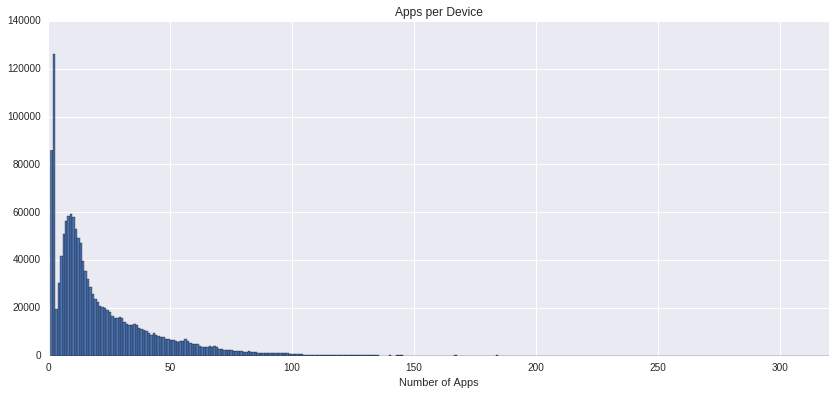

In [27]:
f,ax = plt.subplots(1,1,figsize=(14,6))
_ = groupae.hist(bins=320, ax=ax)
ax.set_xlim(0,320)
ax.set_title('Apps per Device')
ax.set_xlabel('Number of Apps')

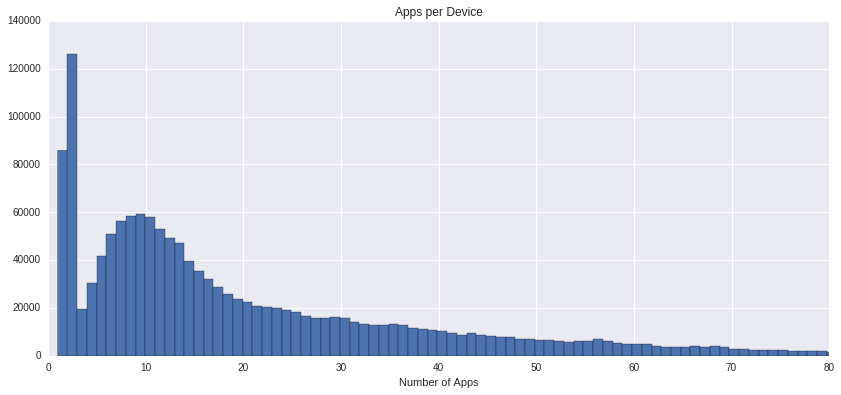

In [28]:
f,ax = plt.subplots(1,1,figsize=(14,6))
_ = groupae.hist(bins=320, ax=ax)
ax.set_xlim(0,80)
ax.set_title('Apps per Device')
ax.set_xlabel('Number of Apps')

Just a quick check, are there any apps that are not installed?

In [96]:
ae['is_installed'].unique()

array([1])

What are the activity status values? If only `0` and `1` values are possible then they are they all True/False...

In [97]:
ae['is_active'].unique()

array([1, 0])

Now merge data to find the most popular categories.

In [29]:
aelc = pd.merge(ae[['event_id', 'app_id']], alc[['app_id', 'category']], how='left')
aelc.head()

,event_id,app_id,category
0,2,5927333115845830913,Property Industry 1.0
1,2,5927333115845830913,Relatives 1
2,2,5927333115845830913,Property Industry 2.0
3,2,5927333115845830913,Industry tag
4,2,5927333115845830913,IM


In [30]:
aelc['category'].value_counts(normalize=True,ascending=False).head(10).apply(lambda x: str(x*100)[:4]+'%')

Industry tag             11.5%
Property Industry 2.0    8.03%
Property Industry 1.0    6.53%
unknown                  6.22%
Custom label             3.93%
Services 1               3.90%
And the Church           3.46%
Internet banking         2.85%
Finance                  2.38%
P2P                      2.20%
Name: category, dtype: object

In [119]:
print(len(aelc))
print(len(aelc['event_id'].unique()))

209355710
1488096


### What are the most popular apps by demographic?

Merge event and device table with device and group table. Then merge group data to category data on the `event_id`. Inner joins are fine since event and device ids are unique and if there is no `event_id` then there are no apps listed for that device.

In [11]:
evpbdm = pd.merge(ev[['device_id', 'event_id']], popbrand[['device_id','group']], on='device_id', how='inner')
evpbdm.head()

,device_id,event_id,group
0,29182687948017175,1,M39+
1,29182687948017175,7104,M39+
2,29182687948017175,29661,M39+
3,29182687948017175,33133,M39+
4,29182687948017175,38980,M39+


In [31]:
appgroup = pd.merge(ae[['event_id', 'app_id']], evpbdm[['group', 'event_id']], on='event_id', how='inner')

In [32]:
appgroup.head(10)

,event_id,app_id,group
0,6,-7377004479023402858,M22-
1,6,6284164581582112235,M22-
2,6,5927333115845830913,M22-
3,6,3433289601737013244,M22-
4,6,-3467200097934864127,M22-
5,6,6924337203824723352,M22-
6,6,-3955212733485100109,M22-
7,6,-2102196853266493861,M22-
8,6,8693964245073640147,M22-
9,6,6439247542005098738,M22-


In [33]:
appgroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12273452 entries, 0 to 12273451
Data columns (total 3 columns):
event_id    int64
app_id      int64
group       object
dtypes: int64(2), object(1)
memory usage: 374.6+ MB


In [34]:
appgroup.drop('event_id', axis=1, inplace=True)
appgroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12273452 entries, 0 to 12273451
Data columns (total 2 columns):
app_id    int64
group     object
dtypes: int64(1), object(1)
memory usage: 280.9+ MB


In [43]:
popgroup = pd.merge(appgroup, alc[['app_id','category']], how='left', on='app_id')

In [44]:
print(popgroup.shape)
print(popgroup.info())
popgroup.head()

(79061565, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79061565 entries, 0 to 79061564
Data columns (total 3 columns):
app_id      int64
group       object
category    object
dtypes: int64(1), object(2)
memory usage: 2.4+ GB
None


,app_id,group,category
0,-7377004479023402858,M22-,Property Industry 1.0
1,-7377004479023402858,M22-,Personal Effectiveness 1
2,-7377004479023402858,M22-,Property Industry 2.0
3,-7377004479023402858,M22-,unknown
4,-7377004479023402858,M22-,unknown


In [41]:
# popgroup.drop('app_id', axis=1, inplace=True)
popgroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79061565 entries, 0 to 79061564
Data columns (total 2 columns):
group       object
category    object
dtypes: object(2)
memory usage: 1.8+ GB


In [45]:
popcat = popgroup.groupby(['group', 'category']).count()
popcat.head()

app_id
group category                  
F23-  1 free               48622
      1 reputation          1719
      1 vitality            1314
      3 kindom game           80
      80s Japanese comic       6

In [53]:
for g in popcat.index.levels[0]:
    print('Demographic: {0}\nMost popular categories: {1}'.format(
            g, popcat.loc[g].sort_values('app_id', ascending=False).index[:10].values))

Demographic: F23-
Most popular categories: ['Industry tag' 'Property Industry 2.0' 'unknown' 'Property Industry 1.0'
 'Services 1' 'Custom label' 'Relatives 1' '1 free' 'And the Church'
 'Internet banking']
Demographic: F24-26
Most popular categories: ['Industry tag' 'Property Industry 2.0' 'unknown' 'Property Industry 1.0'
 'Services 1' 'Custom label' 'And the Church' 'Internet banking'
 'Relatives 1' 'Finance']
Demographic: F27-28
Most popular categories: ['Industry tag' 'Property Industry 2.0' 'Property Industry 1.0' 'unknown'
 'Services 1' 'Custom label' 'And the Church' 'Internet banking' 'Finance'
 'Relatives 1']
Demographic: F29-32
Most popular categories: ['Industry tag' 'Property Industry 2.0' 'unknown' 'Property Industry 1.0'
 'Services 1' 'Custom label' 'And the Church' 'Internet banking' 'Finance'
 'Relatives 1']
Demographic: F33-42
Most popular categories: ['Industry tag' 'Property Industry 2.0' 'Property Industry 1.0' 'unknown'
 'Custom label' 'Services 1' 'And the Church

So really what we want to find are values that are large relative to their overall frequency in the dataset. Like TF-IDF.

The total number of demographics is 12. Need to find how many groups contain that category.

In [72]:
catcounts = popcat.reset_index(level=0, drop=True)
catcounts.reset_index(drop=False, inplace=True)
catcounts = catcounts.groupby('category').count()
catcounts.head()

,app_id
category,
1 free,12
1 reputation,12
1 vitality,12
3 kindom game,12
80s Japanese comic,12


In [76]:
# for each demographic, add a column that calculates tf-idf, by looking up values in the catcounts df

# for g in popcat.index.levels[0]:
#     vals = []
#     for row in popcat.loc[g].index:
#         vals.append(catcounts.loc[row])
#     popcat.loc[g]['nt'] = vals
#     popcat.loc[g]['tfidf'] = popcat.loc[g]['app_id'] * (12/popcat.loc[g]['nt'])
dfx = popcat.loc['F23-']
dfx.head()

,app_id
category,
1 free,48622
1 reputation,1719
1 vitality,1314
3 kindom game,80
80s Japanese comic,6


In [91]:
flag = False
for g in popcat.index.levels[0]:
    dfx = popcat.loc[g]
    vals = []
    for row in dfx.index:
        vals.append(catcounts.loc[row].values[0])
    dfx['nt'] = vals
    dfx['tfidf'] = dfx['app_id'] * np.log2(len(popcat.index.levels[0])/dfx['nt'])
    if flag==False:
        mode = 'w'
        flag = True
    else:
        mode = 'a'
    dfres = dfx.sort_values('tfidf', ascending=False)
    dfres.to_csv(dataurl+'popcatgroup.csv', sep=',', mode=mode, index_label=g)
    print()
    print('Demographic: {0}\nMost popular categories: {1}'.format(
        g, dfres.head(10).index.tolist()))


Demographic: F23-
Most popular categories: ['Adventure Game', 'Vermicelli', 'other ball game', 'entertainment', 'love raising up', 'KTV', 'reality show', 'shows', 'App Store', 'Table Games']

Demographic: F24-26
Most popular categories: ['Puzzle', 'Desktop Enhancements', 'math', 'entertainment', 'Vermicelli', 'Southeast Asia (aviation)', 'tribe', 'Adventure Game', 'game-Finding fault', 'Mother']

Demographic: F27-28
Most popular categories: ['Academic Information', 'raising up game', 'Mother', 'Puzzle', 'sailing game', 'math', 'World of Warcraft', 'Doctors', 'noble', 'pet raising up']

Demographic: F29-32
Most popular categories: ['Mother', 'Vermicelli', 'Literacy Games', 'MOBA', 'Man playing favorites', 'Puzzle', 'Class animation community', 'Turn based RPG game', 'Information', 'Financial Futures']

Demographic: F33-42
Most popular categories: ['Man playing favorites', 'Weather', 'Information', 'math', 'Literacy Games', 'Hong Kong, Macao and Taiwan (Travel)', 'Internet Insurance', '